# Proxy Independent Verification

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
print(cfr.__version__)

2025.7.28


## Load the PAGES2k database

In [2]:
job = cfr.ReconJob()
job.load_proxydb('PAGES2kv2')

### Filter the database

We only need the corals in this example.

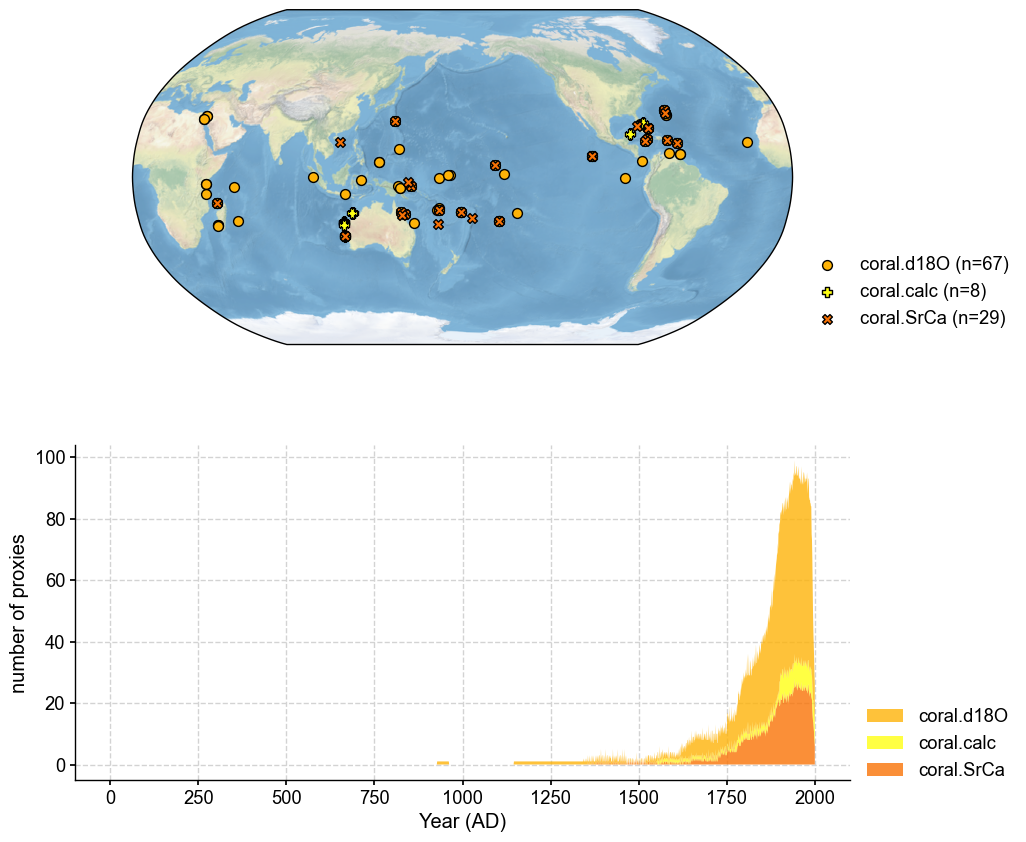

In [3]:
job.filter_proxydb(by='ptype', keys=['coral'])
fig, ax = job.proxydb.plot(plot_count=True)

### Annualize the database

In [4]:
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'], verbose=True)

>>> job.configs["annualize_proxydb_months"] = [12, 1, 2]
>>> job.configs["annualize_proxydb_ptypes"] = ['coral']


Annualizing ProxyDatabase: 100%|██████████| 104/104 [00:01<00:00, 52.89it/s]

>>> 99 records remaining
>>> job.proxydb updated


## Load the gridded climate data

### Load the model prior

In [5]:
job.load_clim(
    tag='prior',
    path_dict={
        'tas': 'iCESM_past1000historical/tas',
    },
    anom_period=(1951, 1980),
)

>>> The target file seems existed at: ./data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...


### Load the instrumental observations

In [6]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': 'gistemp1200_GHCNv4_ERSSTv5',
    },
    rename_dict={'tas': 'tempanomaly'},
    anom_period=(1951, 1980),
)

>>> The target file seems existed at: ./data/gistemp1200_GHCNv4_ERSSTv5.nc.gz . Loading from it instead of downloading ...


## Proxy system modeling

### Calibrating the proxy system models

In [7]:
ptype_psm_dict = {
    'coral.d18O': 'Linear',
    'coral.calc': 'Linear',
    'coral.SrCa': 'Linear',
}

ptype_season_dict = {
    'coral.d18O': [12, 1, 2],
    'coral.calc': [12, 1, 2],
    'coral.SrCa': [12, 1, 2],
}

ptype_clim_dict = {
    'coral.d18O': ['tas'],
    'coral.calc': ['tas'],
    'coral.SrCa': ['tas'],
}

job.calib_psms(
    ptype_psm_dict=ptype_psm_dict,
    ptype_season_dict=ptype_season_dict,
    ptype_clim_dict=ptype_clim_dict,
    calib_period=(1850, 2015),
    verbose=True,
)

>>> job.configs["ptype_psm_dict"] = {'coral.SrCa': 'Linear', 'coral.calc': 'Linear', 'coral.d18O': 'Linear'}
>>> job.configs["ptype_season_dict"] = {'coral.SrCa': [12, 1, 2], 'coral.calc': [12, 1, 2], 'coral.d18O': [12, 1, 2]}
>>> job.configs["ptype_clim_dict"] = {'coral.SrCa': ['tas'], 'coral.calc': ['tas'], 'coral.d18O': ['tas']}
>>> job.configs["psm_calib_period"] = (1850, 2015)


Calibrating the PSMs:  19%|█▉        | 19/99 [00:00<00:01, 40.75it/s]

The number of overlapped data points is 14 < 25. Skipping ...
The number of overlapped data points is 20 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...


Calibrating the PSMs:  31%|███▏      | 31/99 [00:00<00:01, 47.71it/s]

The number of overlapped data points is 9 < 25. Skipping ...
The number of overlapped data points is 24 < 25. Skipping ...


Calibrating the PSMs:  56%|█████▌    | 55/99 [00:01<00:00, 52.13it/s]

The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  80%|███████▉  | 79/99 [00:01<00:00, 52.85it/s]

The number of overlapped data points is 21 < 25. Skipping ...


Calibrating the PSMs: 100%|██████████| 99/99 [00:02<00:00, 47.00it/s]

>>> PSM for Ocn_144 failed to be calibrated.
>>> PSM for Ocn_149 failed to be calibrated.
>>> PSM for Ocn_150 failed to be calibrated.
>>> PSM for Ocn_145 failed to be calibrated.
>>> PSM for Ocn_152 failed to be calibrated.
>>> PSM for Ocn_164 failed to be calibrated.
>>> PSM for Ocn_165 failed to be calibrated.
>>> PSM for Ocn_138 failed to be calibrated.
>>> PSM for Ocn_183 failed to be calibrated.
>>> 90 records tagged "calibrated" with ProxyRecord.psm created


### Forwarding the proxy system models

In [8]:
job.forward_psms()

Forwarding the PSMs: 100%|██████████| 90/90 [00:08<00:00, 10.88it/s]


## Annualizing, regridding, and cropping the prior field

In [9]:
job.annualize_clim(tag='prior', months=[12, 1, 2], verbose=True)
job.regrid_clim(tag='prior', nlat=42, nlon=63, verbose=True)
job.crop_clim(tag='prior', lat_min=-35, lat_max=35, verbose=True)

>>> job.configs["prior_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.prior updated
>>> job.configs["prior_regrid_nlat"] = 42
>>> job.configs["prior_regrid_nlon"] = 63
>>> Processing tas ...
>>> job.configs["prior_lat_min"] = -35
>>> job.configs["prior_lat_max"] = 35
>>> job.configs["prior_lon_min"] = 0
>>> job.configs["prior_lon_max"] = 360
>>> Processing tas ...


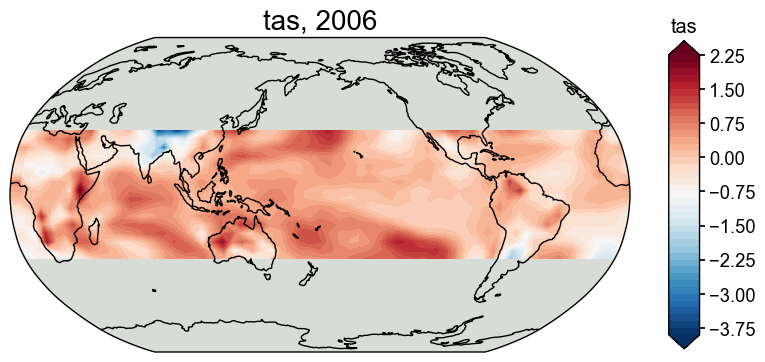

In [10]:
fig, ax = job.prior['tas'][-1].plot()

## Run the DA solver

In [11]:
dirpath = './recons/lmr-real-pages2k-iv'
job.run_da_mc(
    save_dirpath=dirpath,
    recon_seeds=list(range(1, 11)),
    verbose=True,
)

>>> job.configs["recon_period"] = [0, 2000]
>>> job.configs["recon_loc_rad"] = 25000
>>> job.configs["recon_timescale"] = 1
>>> job.configs["recon_vars"] = ['tas']
>>> job.configs["nens"] = 100
>>> job.configs["recon_seeds"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
>>> job.configs["assim_frac"] = 0.75
>>> job.configs["save_dirpath"] = ./recons/lmr-real-pages2k-iv
>>> job.configs["compress_params"] = {'zlib': True}
>>> job.configs["output_full_ens"] = False
>>> job.configs["recon_sampling_mode"] = fixed
>>> job.configs["trim_prior"] = True
>>> job.configs["allownan"] = False
>>> seed: 1 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:07<00:00, 259.28it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r01_recon.nc
>>> seed: 2 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:09<00:00, 205.44it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r02_recon.nc
>>> seed: 3 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:10<00:00, 195.57it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r03_recon.nc
>>> seed: 4 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:10<00:00, 190.49it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r04_recon.nc
>>> seed: 5 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:10<00:00, 187.58it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r05_recon.nc
>>> seed: 6 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:10<00:00, 185.06it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r06_recon.nc
>>> seed: 7 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:10<00:00, 185.12it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r07_recon.nc
>>> seed: 8 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:10<00:00, 184.29it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r08_recon.nc
>>> seed: 9 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:10<00:00, 182.03it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r09_recon.nc
>>> seed: 10 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:10<00:00, 183.81it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k-iv/job_r10_recon.nc
>>> DONE! Total time spent: 2.51 mins.


In [12]:
# save the job
job.save(dirpath)

## Independent Verification

In [24]:
%%time
# del job
res = cfr.ReconRes(dirpath)
res.load(['nino3.4', 'tas'], verbose=True)
# load the assim and eval proxy labels
res.load_proxylabels(verbose=True)
# calcualte verification statistics
info = res.indpdt_verif(dirpath)

>>> ReconRes.recons["nino3.4"] created
>>> ReconRes.da["nino3.4"] created
>>> ReconRes.recons["tas"] created
>>> ReconRes.da["tas"] created
>>> ReconRes.proxy_labels created


Forwarding the PSMs: 100%|██████████| 90/90 [00:08<00:00, 10.57it/s]


CPU times: user 1min 26s, sys: 778 ms, total: 1min 27s
Wall time: 1min 28s


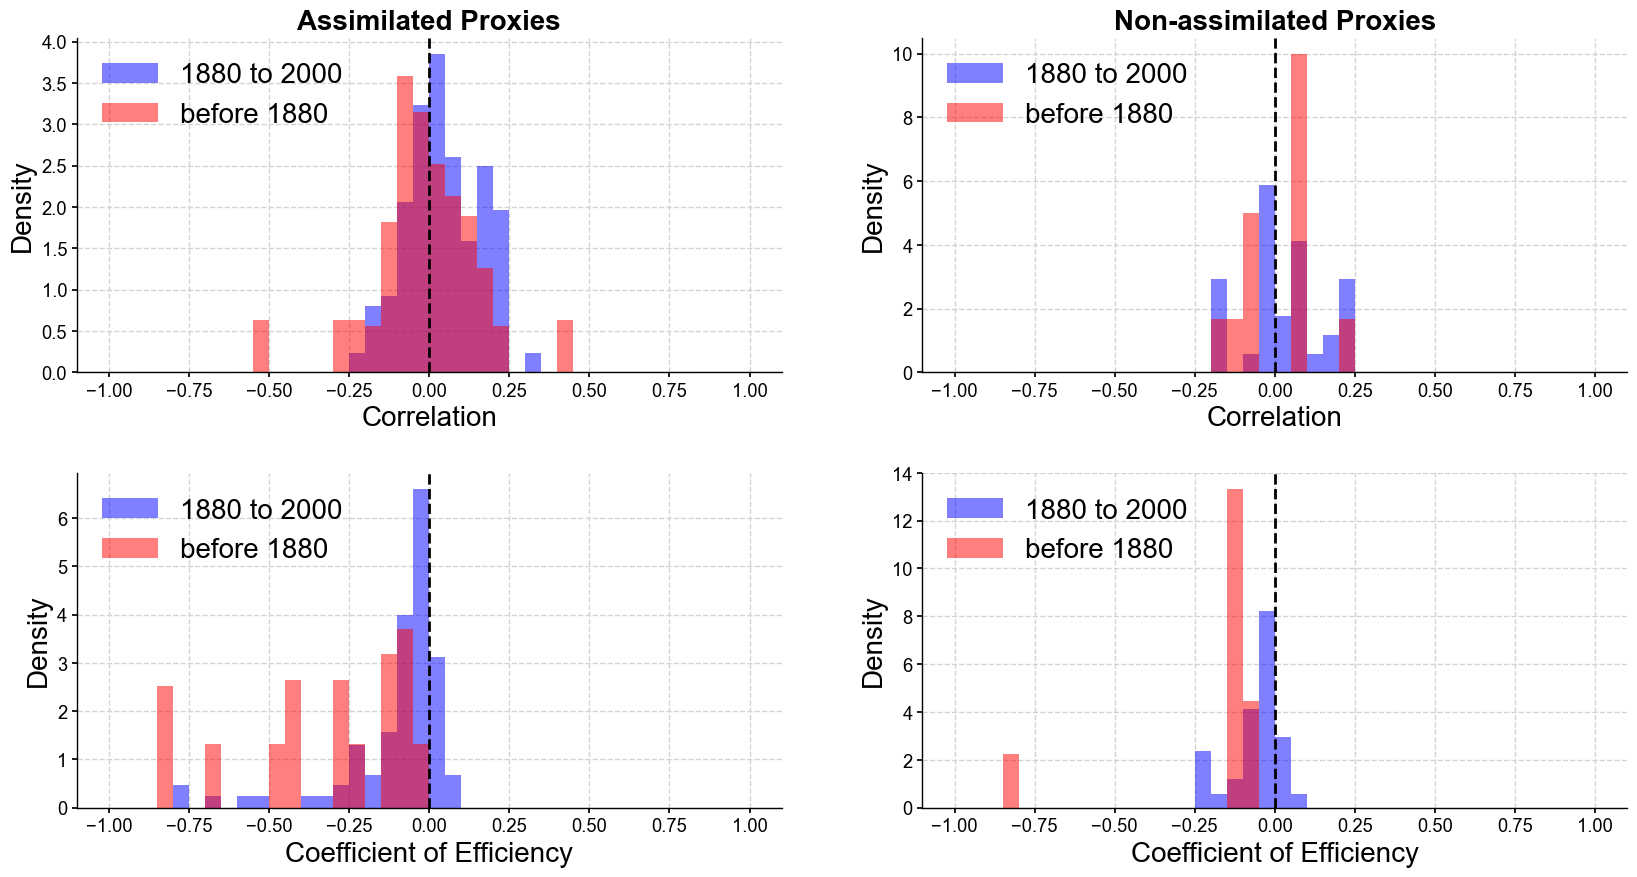

Figure saved at: "recons/indp.pdf"


In [25]:
fig, axs = res.plot_indpdt_verif()
cfr.showfig(fig)
cfr.savefig(fig, './recons/indp.pdf')



In [ ]:
res.indpdt_info

,name,seasonality,assim,all_corr,all_ce,in_corr,in_ce,before_corr,before_ce
0,Ocn_065,"[12, 1, 2]",True,-0.020908,-0.568751,-0.054764,-0.011768,0.023986,-1.274442
1,Ocn_075,"[12, 1, 2]",True,-0.037912,-0.008439,0.109152,-0.007393,-0.125915,-0.009779
2,Ocn_078,"[12, 1, 2]",True,0.245147,-0.070573,0.023250,-0.128030,0.417165,-1.940210
3,Ocn_167,"[12, 1, 2]",True,-0.080107,-0.280092,-0.080107,-0.280092,NaN,NaN
4,Ocn_096,"[12, 1, 2]",False,0.091076,-0.295778,0.216488,0.021983,0.055508,-1.109874
...,...,...,...,...,...,...,...,...,...
895,Ocn_087,"[12, 1, 2]",True,0.032357,-0.074791,0.019147,-0.060850,0.040361,-0.082167
896,Ocn_153,"[12, 1, 2]",True,0.296108,-0.229486,0.241391,-0.126477,0.089466,-2.810480
897,Ocn_169,"[12, 1, 2]",True,-0.173925,-0.144552,-0.173925,-0.144552,NaN,NaN
898,Ocn_071,"[12, 1, 2]",True,0.078836,-0.164450,0.078836,-0.164450,NaN,NaN
